In [1]:
import pandas as pd
import os
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("netflix.csv")

# 1. Defining Problem Statement and Analysing basic metrics (10 Points) 

1. Explore the Netflix dataset and come up with data driven insights.
2. Explore the data from basic details like dataset size,no. of columns to unique values in columns,count of nan values,logic for na values imputation.
3. creating columns from columns for in depth analysis(example year from date_added)
4. Nesting of data and further exploration

# 2.  Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points) 

## a. Shape of Dataset

In [3]:
print(df.shape)

(8807, 12)


## b. data types of all attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


only added_year,duration and release_year are int types rest all are objects. 
The reason for this is data types have a variable length,therefore strings are automatically set to object type.

## c. missing value detection

In [5]:
df.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

cast country director and rating have missing values rest all the columns are good

## d. are there duplicates in data?

In [6]:
df.shape[0]!=df.drop_duplicates().shape[0]

False

## e. statistical summary

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


TV Shows/Title have been added from 2008 onwards in this dataset

### Cast

In [8]:
print("Total nan values:",df["cast"].isna().sum())

Total nan values: 825


In [9]:
x=df["cast"].apply(lambda x: len(str(x).split(",")))

In [10]:
print("max no. of cast in Movie/TV Show",max(x.values))

print("min no. of cast in Movie/TV Show",min(x.values))

max no. of cast in Movie/TV Show 50
min no. of cast in Movie/TV Show 1


we cant identify no. os unique cast as cast are clubbed togather , needs to be unnested

# 3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points) 

## added_year

In [11]:
df["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [12]:
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

Data is from 1943 onwards to 2020

### Country

In [13]:
df["country"].value_counts()

United States                                              2818
India                                                       972
United Kingdom                                              419
Japan                                                       245
South Korea                                                 199
                                                           ... 
United Kingdom, Poland                                        1
Namibia                                                       1
United States, Italy, France, Japan                           1
United Kingdom, France, Belgium, Ireland, United States       1
Luxembourg                                                    1
Name: country, Length: 748, dtype: int64

max content are from countries like US,INDIA.
there are countries clubbed togather that needs to be unnested 

In [14]:
df["country"].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [15]:
len(df["country"].unique())

749

749 could not be be possible as total countries.countries are clubbed togather, needs to be unnested

## description

In [16]:
df["description"]

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

just the description of title

## director

In [17]:
df["director"].value_counts()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
                          ..
Jorge Michel Grau          1
Thom Fitzgerald            1
Hikari                     1
Milind Dhaimade            1
John Irvin                 1
Name: director, Length: 4528, dtype: int64

Rajiv Chikala seems to be the director with most shows/movies

In [18]:
x=df["director"].apply(lambda x: len(str(x).split(",")))

In [19]:
print("max no. of director in Movie/TV Show",max(x.values))

print("min no. of director in Movie/TV Show",min(x.values))

max no. of director in Movie/TV Show 13
min no. of director in Movie/TV Show 1


In [20]:
print("{} is the title with {} directors".format(df.iloc[list(x).index(max(x.values))]["title"],max(x.values)))

Walt Disney Animation Studios Short Films Collection is the title with 13 directors


In [21]:
df.iloc[list(x).index(max(x.values))]

show_id                                                     s5888
type                                                        Movie
title           Walt Disney Animation Studios Short Films Coll...
director        Chris Buck, Jennifer Lee, Patrick Osborne, Lau...
cast            Kristen Bell, Josh Gad, Jonathan Groff, Idina ...
country                                             United States
date_added                                       October 25, 2015
release_year                                                 2015
rating                                                       TV-Y
duration                                                   90 min
listed_in                                Children & Family Movies
description     This collection of 12 short films from Disney ...
Name: 5887, dtype: object

## listed in

In [22]:
df["listed_in"].value_counts()

Dramas, International Movies                                       362
Documentaries                                                      359
Stand-Up Comedy                                                    334
Comedies, Dramas, International Movies                             274
Dramas, Independent Movies, International Movies                   252
                                                                  ... 
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy      1
TV Horror, TV Mysteries, Teen TV Shows                               1
Crime TV Shows, International TV Shows, TV Thrillers                 1
TV Action & Adventure                                                1
Docuseries, Science & Nature TV, TV Comedies                         1
Name: listed_in, Length: 514, dtype: int64

looking at the genres and unique values this column also needs to be unnested

### rating

In [23]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

In [24]:
print("unique categories in rating:",df["rating"].unique().shape[0])

unique categories in rating: 18


## type

In [25]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

the type can only be either TV show/movies with Movies are as double as TV Show

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points) 

### few columns like cast , director , country have values clubbed togather therefore separating them out

In [26]:
def splitStack(df,col):
    constraint = df[col].apply(lambda x: str(x).split(', ')).tolist()

    newDf=pd.DataFrame(constraint,index=df["title"])

    newDf=pd.DataFrame(newDf.stack()).reset_index()

    newDf=newDf[["title",0]]

    newDf.columns=["title",col]
    
    return newDf
    
cast = splitStack(df,"cast")

director = splitStack(df,"director")

country = splitStack(df,"country")

listed_in = splitStack(df,"listed_in")

data_frames=[df,cast,director,country,listed_in]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['title'],
                                            how='outer'), data_frames)

df_merged = df_merged.drop(["director_x","cast_x","country_x","listed_in_x"],axis=1).rename({"cast_y":"cast","director_y":"director","country_y":"country","listed_in_y":"listed_in"},axis=1)

In [27]:
### extract year from date_added
def extractYear(x):
    if not(pd.isna(x["date_added"])):
        x["added_year"] = x["date_added"].split(",")[1]
    return x

df_merged=df_merged.apply(extractYear,axis=1)

### releaseYear

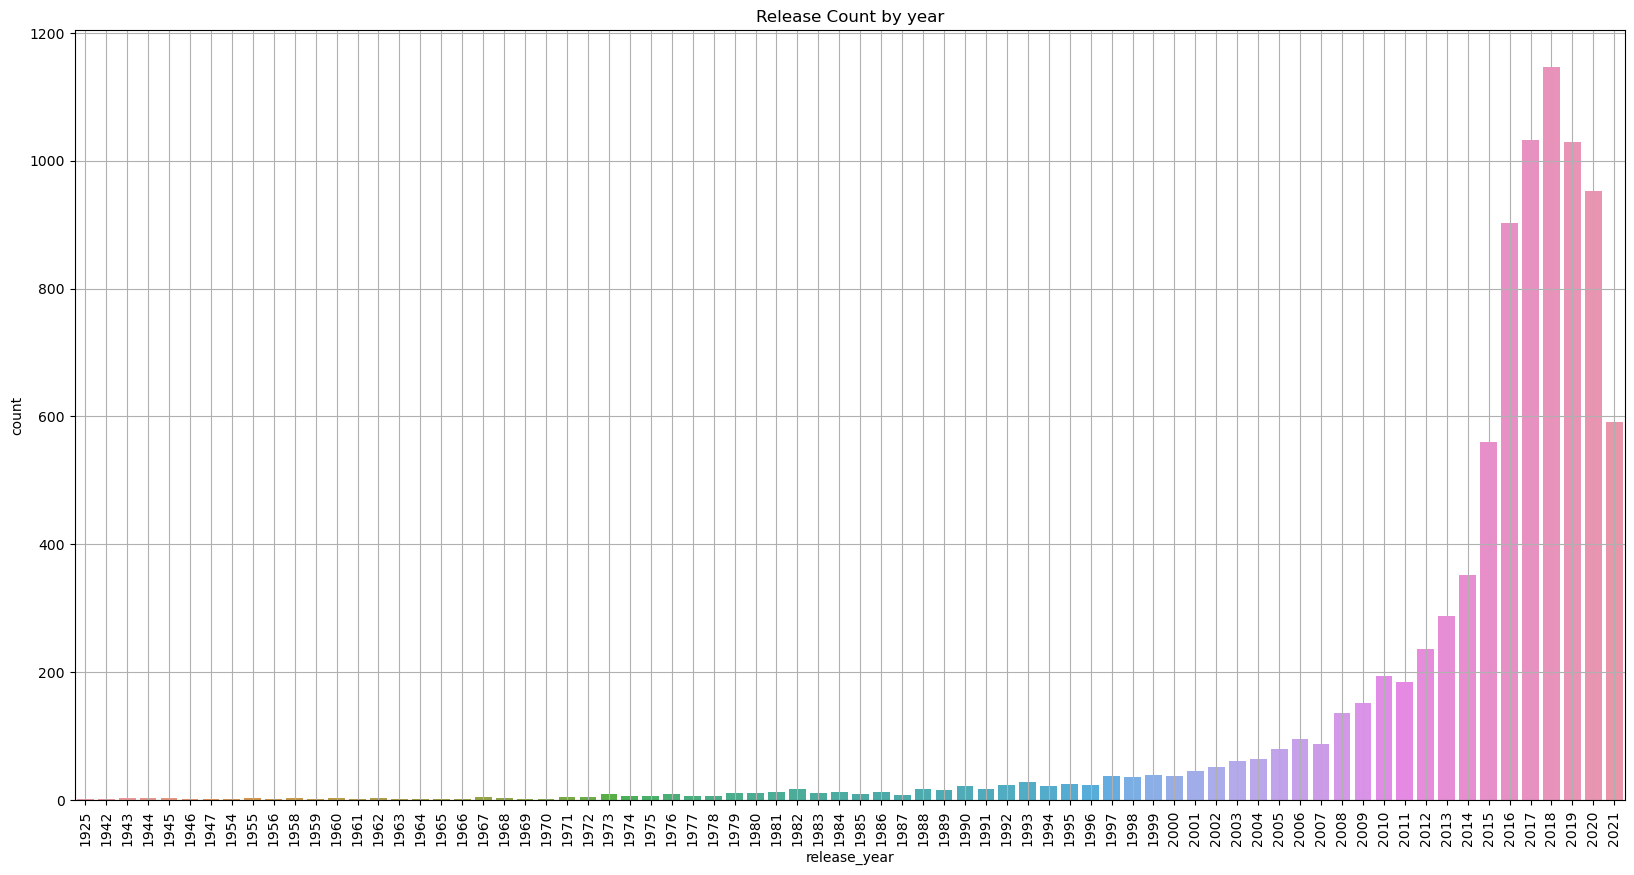

In [28]:

releaseYearCount=df_merged[["title","release_year"]].drop_duplicates()
addedYearCount=df_merged[["title","added_year"]].drop_duplicates()

plt.figure(figsize=(20,10))
sns.countplot(x=releaseYearCount["release_year"],data=releaseYearCount)
plt.xticks(rotation=90)
plt.grid()
plt.title("Release Count by year")
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


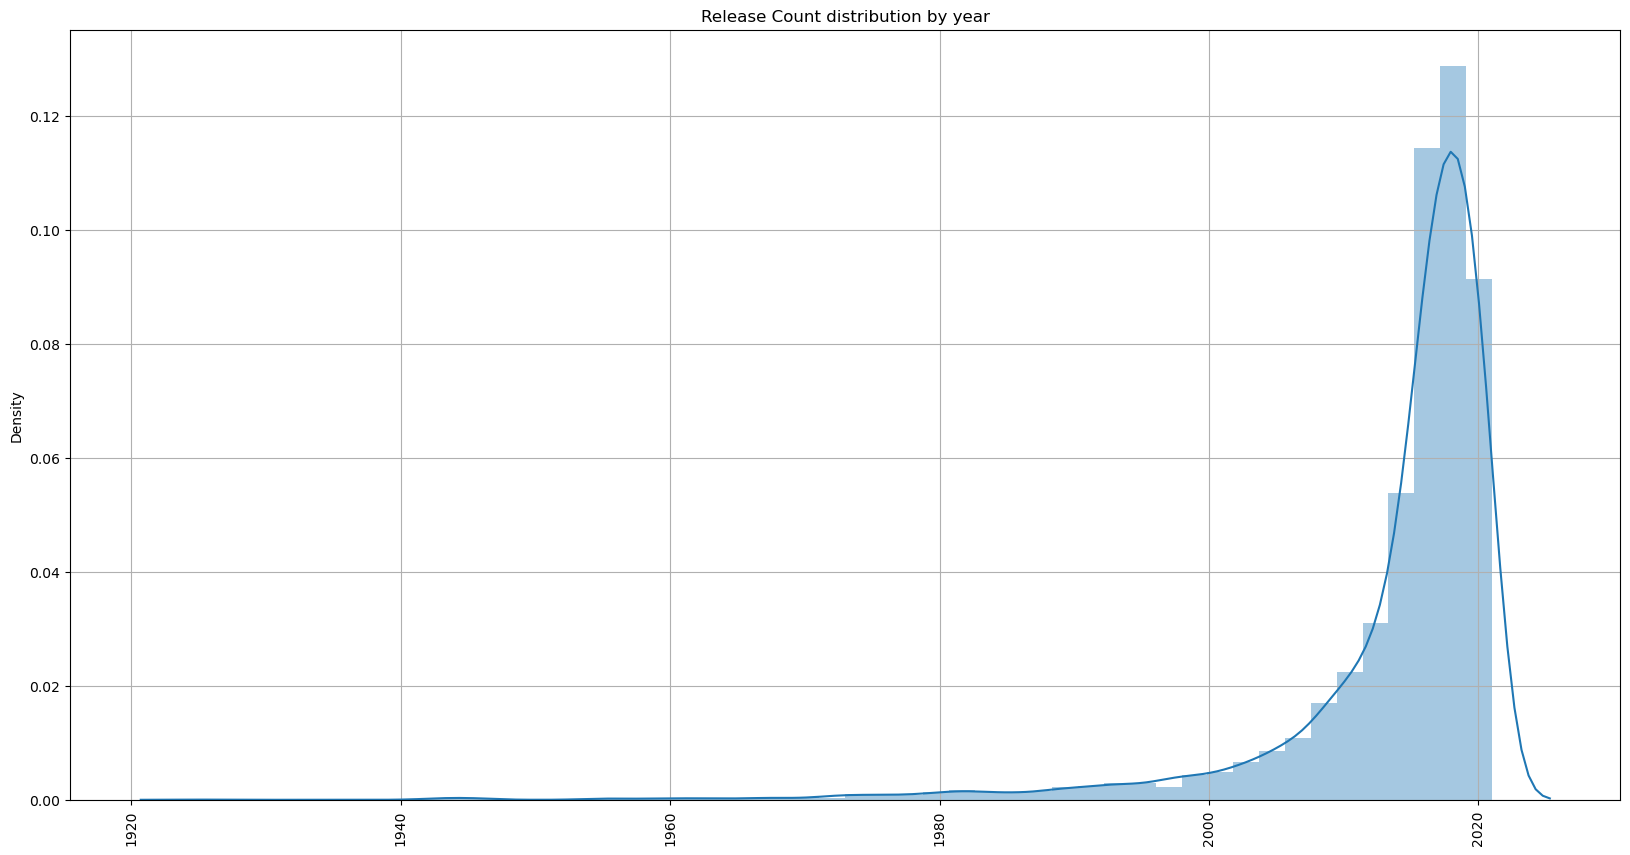

In [29]:
plt.figure(figsize=(20,10))
sns.distplot(x=releaseYearCount["release_year"])
plt.xticks(rotation=90)
plt.grid()
plt.title("Release Count distribution by year")
plt.show()

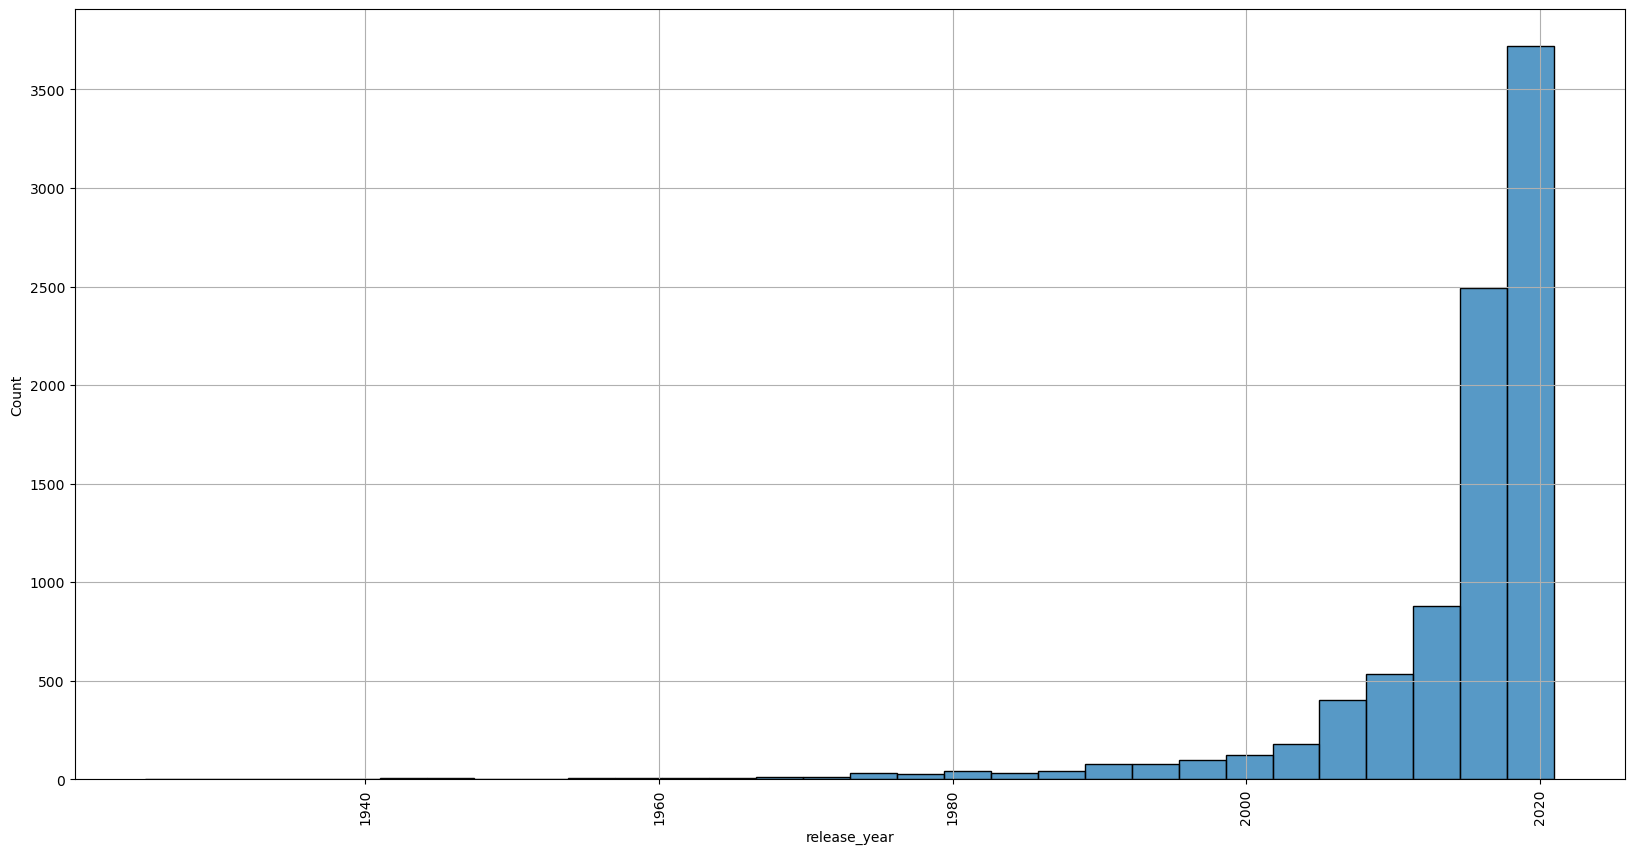

In [31]:
plt.figure(figsize=(20,10))
sns.histplot(x=releaseYearCount["release_year"],bins=30)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## addedYear

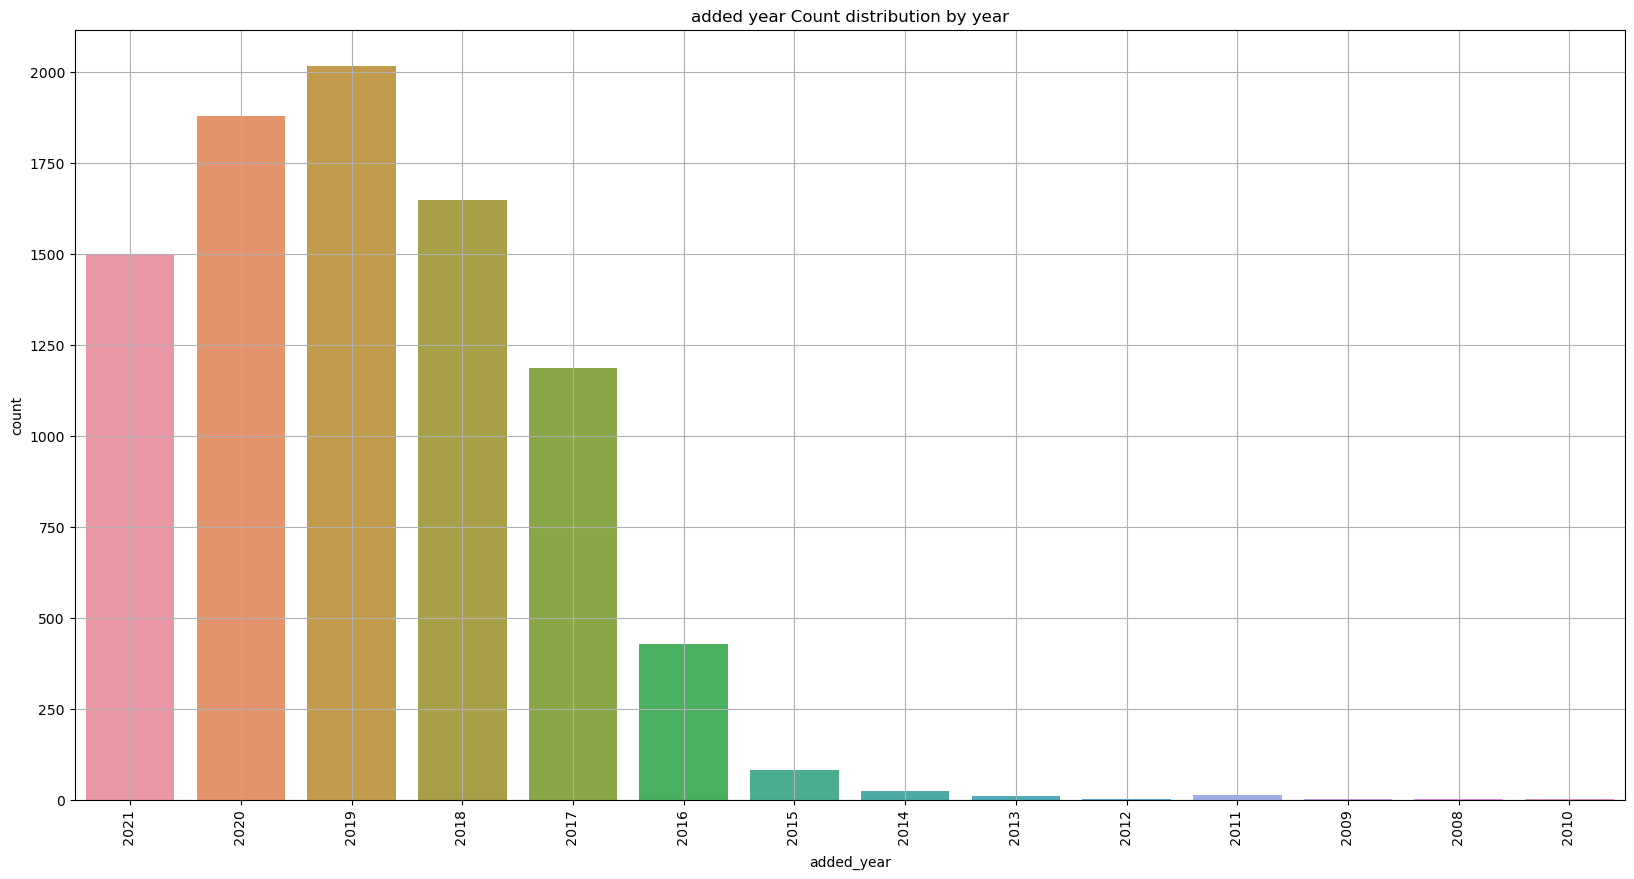

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=addedYearCount["added_year"],data=addedYearCount)
plt.xticks(rotation=90)
plt.grid()
plt.title("added year Count distribution by year")
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


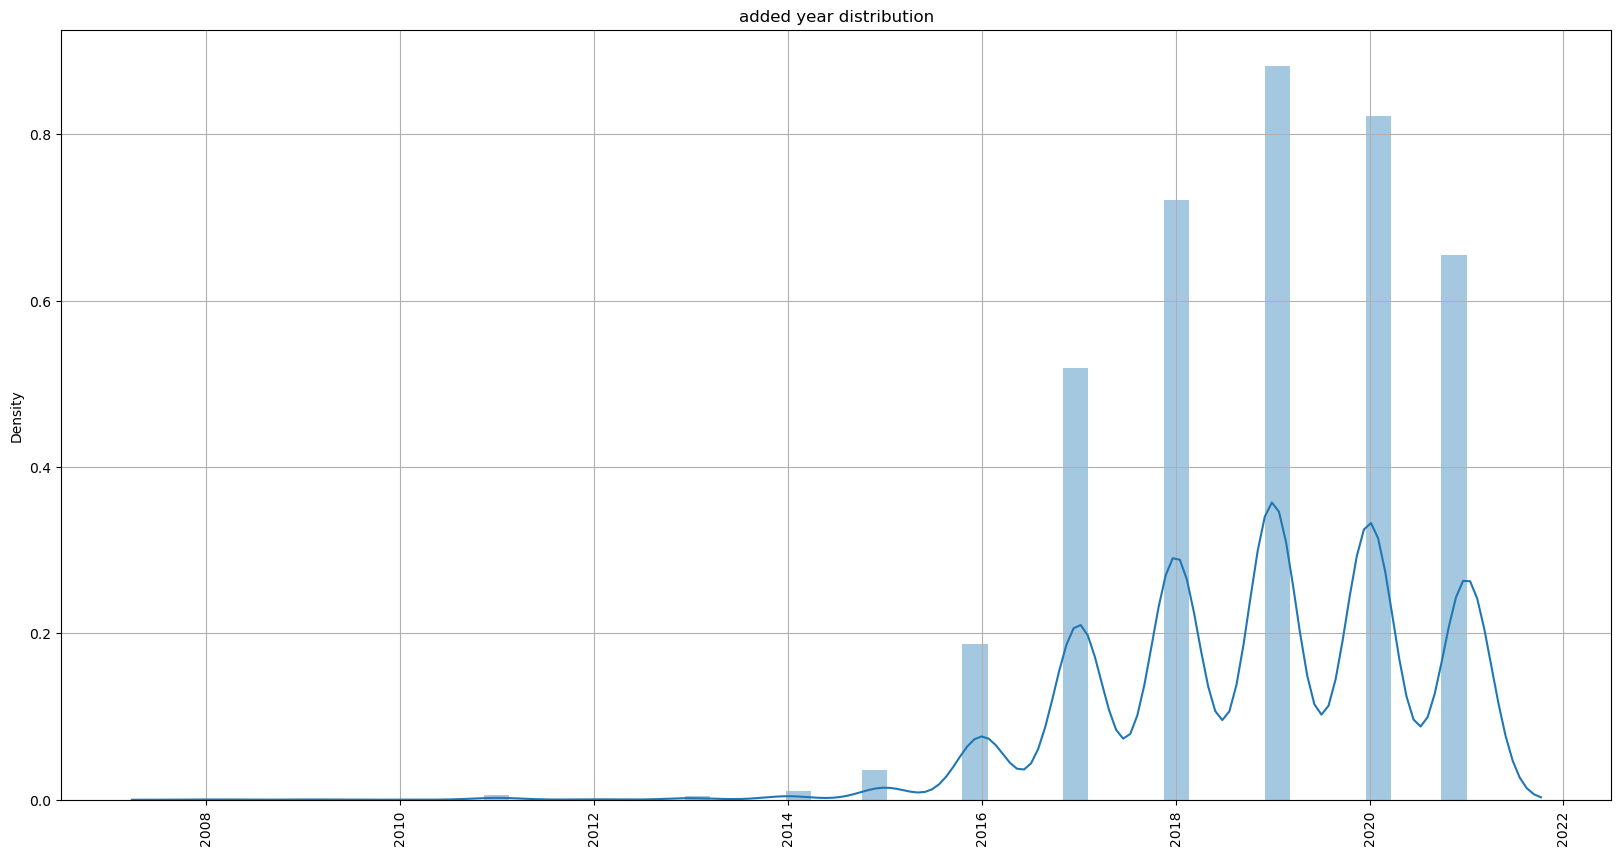

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(x=addedYearCount["added_year"])
plt.xticks(rotation=90)
plt.grid()
plt.title("added year distribution")
plt.show()

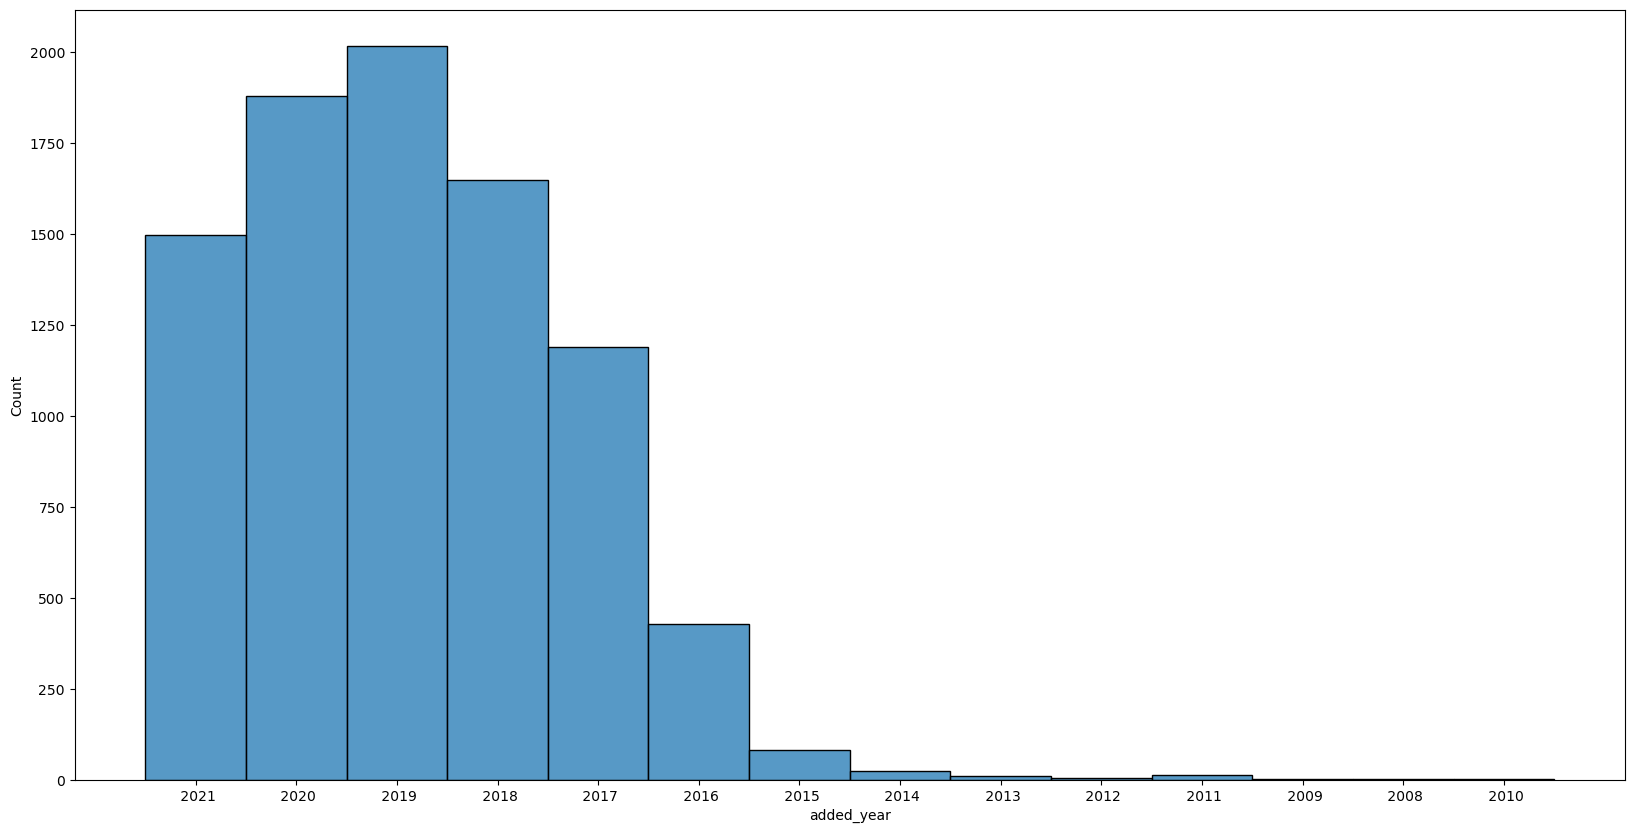

In [34]:
plt.figure(figsize=(20,10))
sns.histplot(x=addedYearCount.loc[addedYearCount["added_year"].dropna().index]["added_year"])
plt.show()

### series duration

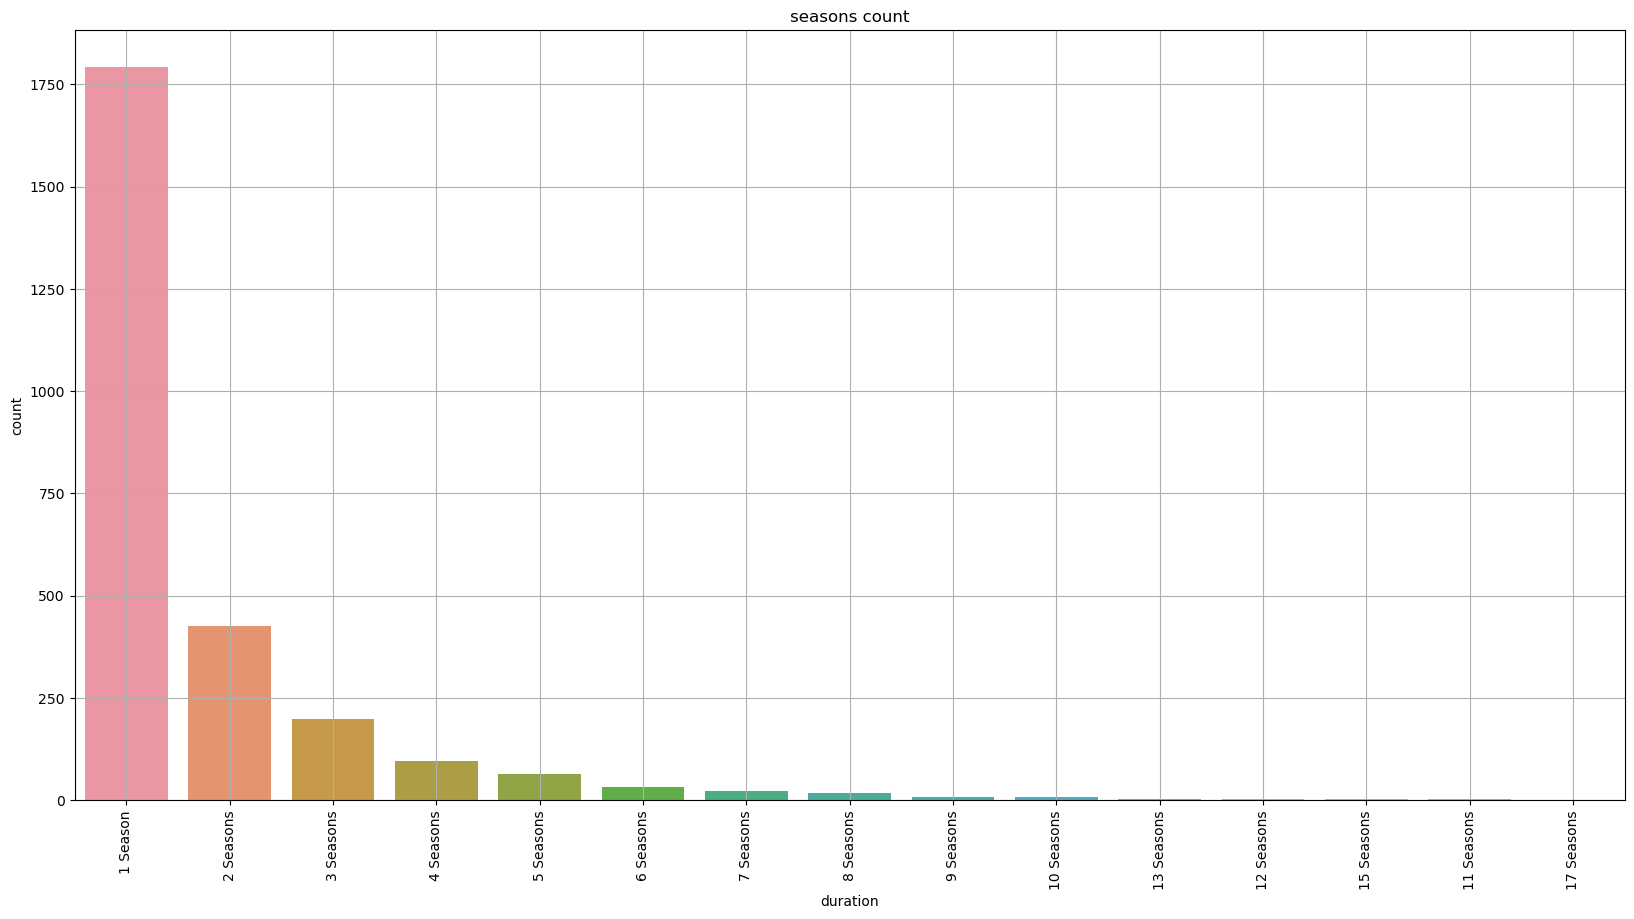

In [35]:
series=df_merged.loc[df_merged["type"]=="TV Show"]
series=series[["title","duration"]].drop_duplicates()

plt.figure(figsize=(20,10))
sns.countplot(x=series["duration"],order=series["duration"].value_counts().index)
plt.xticks(rotation=90)
plt.grid()
plt.title("seasons count")
plt.show()

In [36]:
copyDf=df_merged.copy()

In [37]:
copyDf.dropna(subset=["duration"],inplace=True)

In [38]:
copyDf["duration"] = copyDf["duration"].apply(lambda x:str(x).split()[0])
copyDf["duration"]=copyDf["duration"].astype(int)

In [39]:
series=copyDf.loc[df_merged["type"]=="TV Show"]
series=series[["title","duration"]].drop_duplicates()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


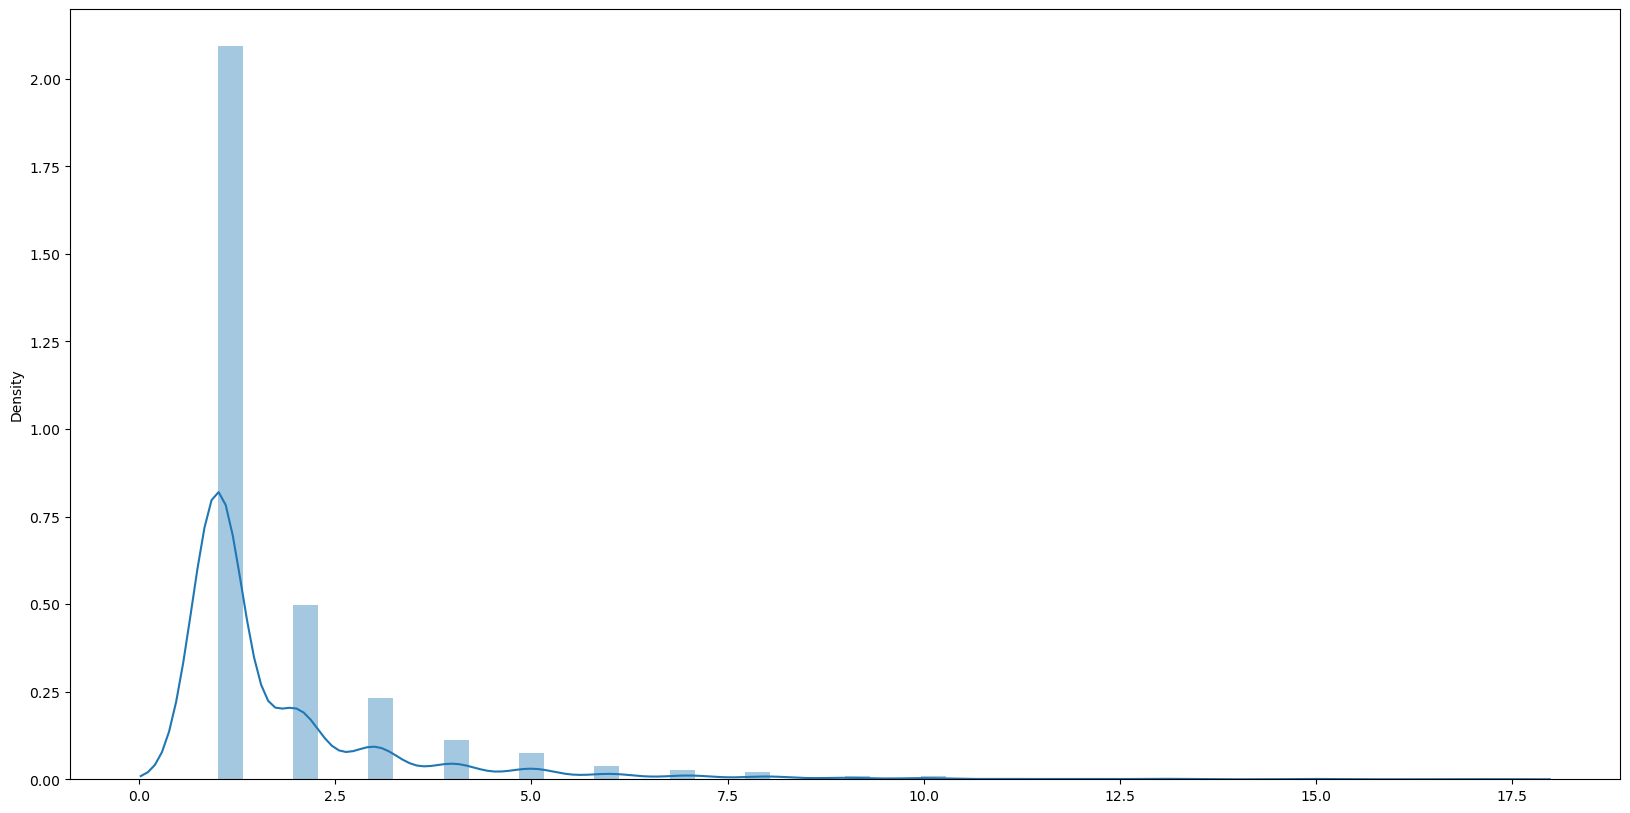

In [40]:
plt.figure(figsize=(20,10))
sns.distplot(x=series["duration"])
plt.show()

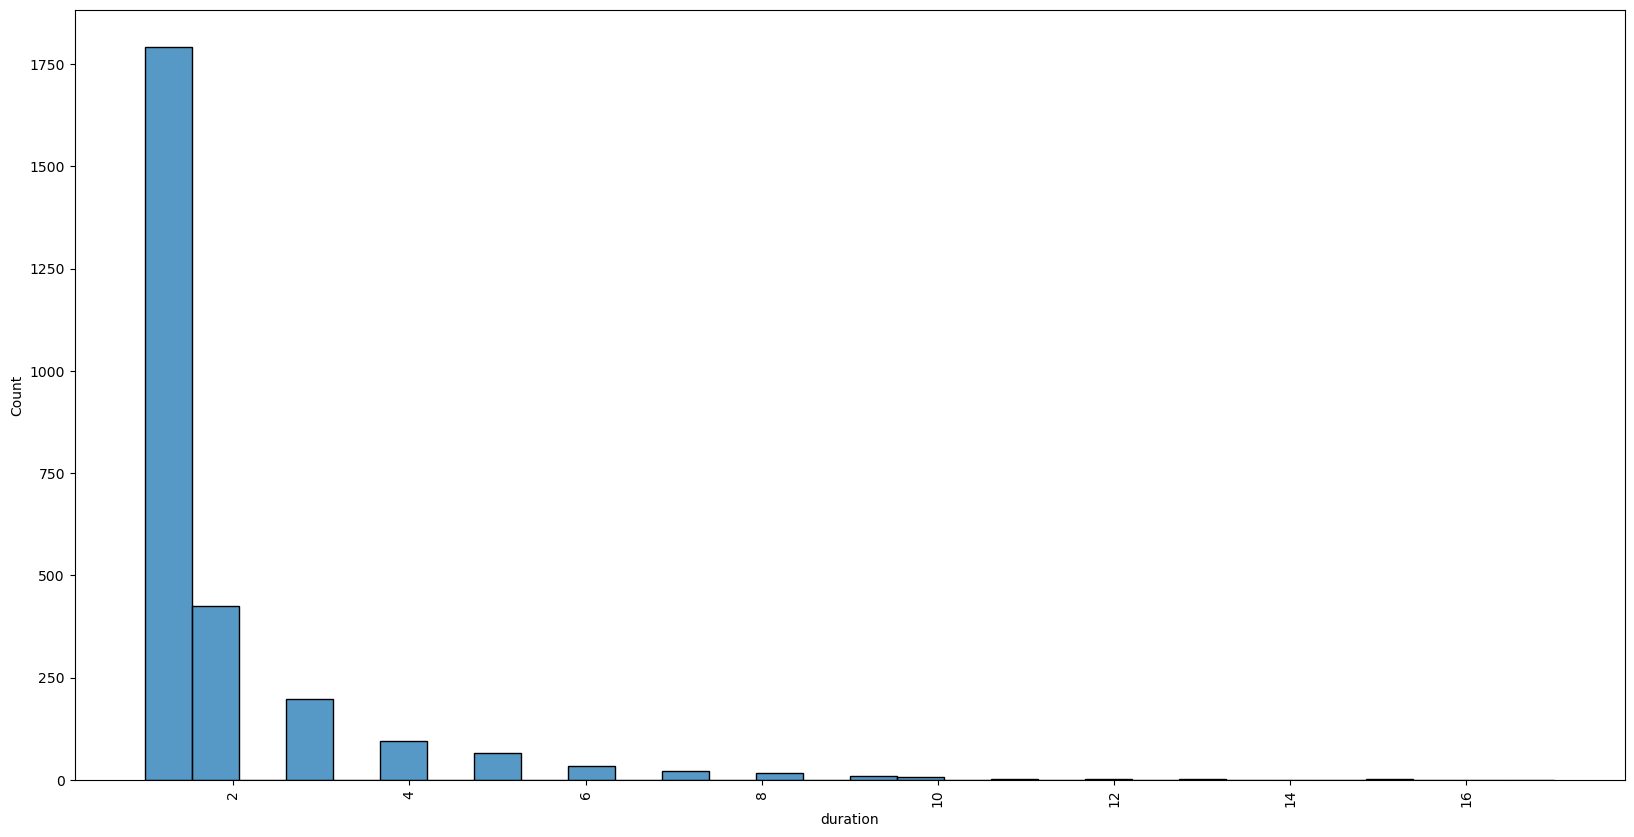

In [41]:

plt.figure(figsize=(20,10))
sns.histplot(x=series["duration"],bins=30)
plt.xticks(rotation=90)
plt.show()

## 4.2 For categorical variable(s): Boxplot (10 Points) 

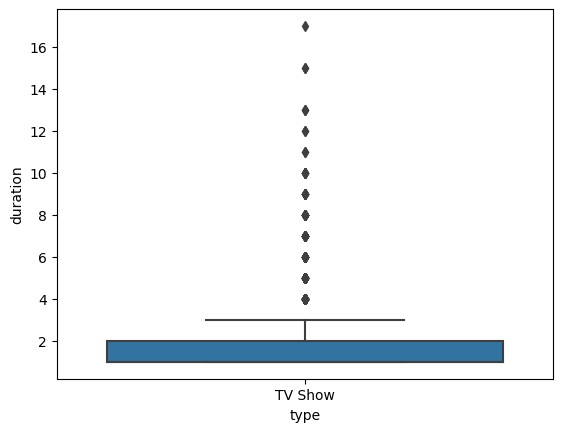

In [42]:
boxplot=copyDf[["title","type","duration"]].drop_duplicates()

boxplot["duration"] = boxplot["duration"].astype(int)
boxPlotTv=boxplot[boxplot["type"]=="TV Show"]
sns.boxplot(x="type",y="duration",data=boxPlotTv)
plt.show()



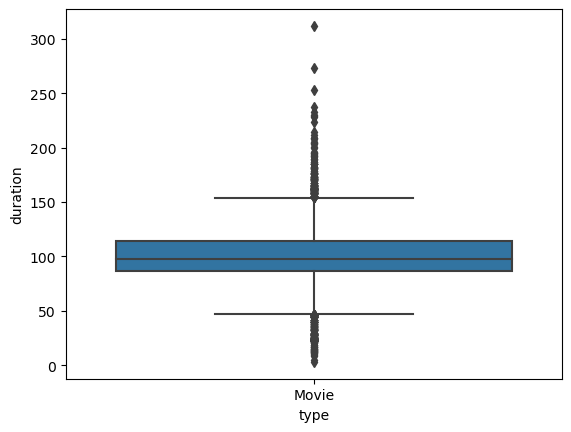

In [43]:
boxPlotTv=boxplot[boxplot["type"]=="Movie"]
sns.boxplot(x="type",y="duration",data=boxPlotTv)
plt.show()

# 4.3 HeatMap

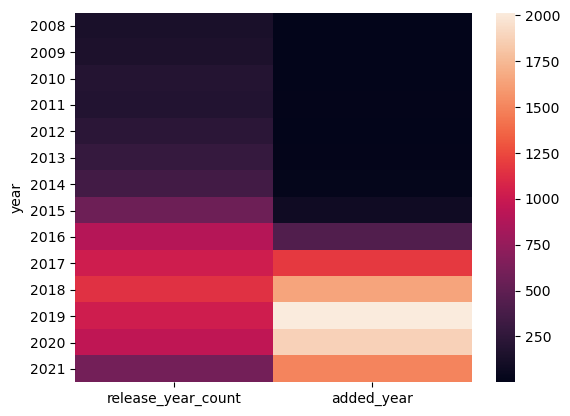

In [44]:
temp=df_merged[["title","release_year","added_year"]].drop_duplicates()

df1=pd.DataFrame()
df1["release_year_count"]=temp.loc[temp["release_year"]>=2008]["release_year"].value_counts()

df2=pd.DataFrame()
df2["added_year"]=temp["added_year"].value_counts()
df2.index=df2.index.astype('int64')

corr=df1.merge(df2,left_on=df1.index,right_on=df2.index)
df2.index=df2.index.astype('int64')
corr.rename(columns={"key_0":"year"},inplace=True)
corr.sort_values(by="year",inplace=True)
corr.index=corr["year"]
corr.drop("year",axis=1,inplace=True)

sns.heatmap(corr)
plt.show()

# 5. Missing Value & Outlier check (Treatment optional) (10 Points)

seems like duration col values were wrongfully assigned to rating col for movies Louis C.K. 2017,Louis C.K.: Hilarious,Louis C.K.: Live at the Comedy Store.
therefore assigning it to duration column

In [45]:
index=df_merged[df_merged["duration"].isna()].index
df_merged[df_merged["duration"].isna()]

,added_year,cast,country,date_added,description,director,duration,listed_in,rating,release_year,show_id,title,type
126537,2017,Louis C.K.,United States,"April 4, 2017","Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,NaN,Movies,74 min,2017,s5542,Louis C.K. 2017,Movie
131603,2016,Louis C.K.,United States,"September 16, 2016",Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,NaN,Movies,84 min,2010,s5795,Louis C.K.: Hilarious,Movie
131737,2016,Louis C.K.,United States,"August 15, 2016",The comic puts his trademark hilarious/thought...,Louis C.K.,NaN,Movies,66 min,2015,s5814,Louis C.K.: Live at the Comedy Store,Movie


In [46]:
#assigning values
df_merged.loc[df_merged["duration"].isna(),"duration"]=df_merged[df_merged["duration"].isna()]["rating"].values
df_merged.at[index, 'rating']=np.nan

In [47]:
df_merged.iloc[index]

,added_year,cast,country,date_added,description,director,duration,listed_in,rating,release_year,show_id,title,type
126537,2017,Louis C.K.,United States,"April 4, 2017","Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,74 min,Movies,NaN,2017,s5542,Louis C.K. 2017,Movie
131603,2016,Louis C.K.,United States,"September 16, 2016",Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,84 min,Movies,NaN,2010,s5795,Louis C.K.: Hilarious,Movie
131737,2016,Louis C.K.,United States,"August 15, 2016",The comic puts his trademark hilarious/thought...,Louis C.K.,66 min,Movies,NaN,2015,s5814,Louis C.K.: Live at the Comedy Store,Movie


## Assigning Bheem and Raju like  keyword with INDIA

In [54]:
keyword=["Raju","Bheem","Shiva","Motu","Krishna","Baahubali","Singham"]

x=[]
for i in keyword:
    x.extend(df_merged[df_merged["title"].str.contains(i)].index.to_list())
x=set(x)

print("Total rows with these keywords:",len(x))

df_merged.loc[list(x),"country"]="India"

Total rows with these keywords: 873


#### using 7 keywords 873 rows nan values could be replaced

### missing value in movies vs tv shows

In [59]:
df_merged.replace('nan', np.nan,inplace=True)

In [60]:
df_merged.isna().sum(axis=0)

added_year        158
cast             2146
country         11329
date_added        158
description         0
director        50643
duration            0
listed_in           0
rating             70
release_year        0
show_id             0
title               0
type                0
dtype: int64

In [66]:
print("missing director % in TV SHOWS",(df_merged.isna().sum(axis=0)["director"]-df_merged.loc[df_merged["type"]=="Movie"].isna().sum(axis=0)["director"])/(df_merged.isna().sum(axis=0)["director"])*100)

print("missing cast % in TV SHOWS",(df_merged.isna().sum(axis=0)["cast"]-df_merged.loc[df_merged["type"]=="Movie"].isna().sum(axis=0)["cast"])/(df_merged.isna().sum(axis=0)["cast"])*100)

print("missing country % in TV SHOWS",(df_merged.isna().sum(axis=0)["country"]-df_merged.loc[df_merged["type"]=="Movie"].isna().sum(axis=0)["country"])/(df_merged.isna().sum(axis=0)["country"])*100)

missing director % in TV SHOWS 97.46263057085875
missing cast % in TV SHOWS 38.11742777260019
missing country % in TV SHOWS 50.04854797422544


### for which duration most of the directors are missing?

In [98]:
df=df_merged.copy()

In [99]:
df["duration"] = df["duration"].apply(lambda x:str(x).split()[0])
df["duration"]=df["duration"].astype(int)

In [101]:
print("minimum duration of movie :",df_merged.loc[df_merged["type"]=="Movie"]["duration"].min())

print("maimum duration of movie :",df_merged.loc[df_merged["type"]=="Movie"]["duration"].max())

minimum duration of movie : 10 min
maimum duration of movie : 99 min


In [102]:
print("missing % of directors with only 1 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==1)].isna().sum(axis=0)["director"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])*100)

print("missing % of cast with only 1 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==1)].isna().sum(axis=0)["cast"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])*100)

print("missing % of country with only 1 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==1)].isna().sum(axis=0)["country"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])*100)

missing % of directors with only 1 season : 39.8334616475546
missing % of cast with only 1 season : 17.359413202933986
missing % of country with only 1 season : 14.250440917107584


In [103]:
print("missing % of directors with only 2 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==2)].isna().sum(axis=0)["director"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])*100)

print("missing % of cast with only 2 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==2)].isna().sum(axis=0)["cast"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])*100)

print("missing % of country with only 2 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==2)].isna().sum(axis=0)["country"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])*100)

missing % of directors with only 2 season : 81.70104137120629
missing % of cast with only 2 season : 88.63080684596576
missing % of country with only 2 season : 90.37037037037037


In [104]:
print("missing % of directors with only 3 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==3)].isna().sum(axis=0)["director"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["director"])*100)

print("missing % of cast with only 3 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==3)].isna().sum(axis=0)["cast"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["cast"])*100)

print("missing % of country with only 3 season :",((df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])-(df.loc[(df["type"]=="TV Show") & (df["duration"]==3)].isna().sum(axis=0)["country"]))/(df.loc[(df["type"]=="TV Show")].isna().sum(axis=0)["country"])*100)

missing % of directors with only 3 season : 89.91450220835529
missing % of cast with only 3 season : 95.2322738386308
missing % of country with only 3 season : 97.49559082892416


#### But only 11.52 % of the TV shows has season >3

In [105]:
(len(df.loc[(df["type"]=="TV Show")])-len(df.loc[(df["type"]=="TV Show") & (df["duration"]<=3)]))/(len(df.loc[(df["type"]=="TV Show")]))*100

11.523117475243998

# 6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

### since movies have release time long before they were added so we are trying to restrict data by least added year

In [77]:
df.dropna(subset=["added_year"],inplace=True)
df.dropna(subset=["release_year"],inplace=True)

In [78]:
df["added_year"] = df["added_year"].astype(int)
df["release_year"] = df["release_year"].astype(int)

In [79]:
dfrelease=df.loc[df["release_year"]>=df["added_year"].min()]
dfadded=df.loc[df["added_year"]>=df["added_year"].min()]

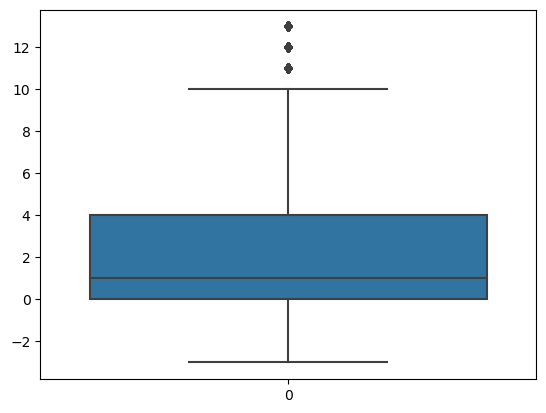

In [80]:
sns.boxplot(data=dfadded["added_year"]-dfrelease["release_year"])
plt.show()

## This plot shows that few movies are added before they were released but that is not possible

### for those instances equating the release and added year 

In [81]:
df.loc[df["added_year"]<df["release_year"],"added_year"]=df.loc[df["added_year"]<df["release_year"],"release_year"]

1. There is high volume of movies released between 2015-2021
2. In 2019 most movies/TV shows are added
3. Most of the TV shows have only 1 season.
4. The TV shows with >=4 seasons are coming in more than 100 percentile bracket(outliers)
5. Movies with lenght less than 50 minutes are under 25 percentile and more than 170 minutes are comes under more than 100 percentile bracket.
6. Release year and year added has high correlation from year 2015-2021

# 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

# Most Popular cast Country wise

In [82]:
df_merged.replace('nan', np.nan,inplace=True)
popCast = df_merged.drop_duplicates(subset=["country","cast","title"]).dropna(subset=["country","cast","title"])
popCast=popCast.groupby(["country","cast"]).size().reset_index().sort_values(by=0,ascending=False)
popCast.drop_duplicates(subset=["country"],keep="first").head(20)

,country,cast,0
14220,India,Anupam Kher,40
20974,Japan,Takahiro Sakurai,29
49513,United States,Tara Strong,22
32651,United Kingdom,David Attenborough,17
4388,Canada,John Paul Tremblay,14
8112,Egypt,Ahmed Helmy,13
31046,Turkey,Demet Akbağ,13
23834,Nigeria,Blossom Chukwujekwu,12
24924,Philippines,Kathryn Bernardo,11
18165,Indonesia,Reza Rahadian,10


### Anupam Kher seems to be most popular in India

# ------------------------------------------------------------------------------

# popular director in each country

In [83]:
popCast = df_merged.drop_duplicates(subset=["country","director","title"]).dropna(subset=["country","director","title"])
popCast=popCast.groupby(["country","director"]).size().reset_index().sort_values(by=0,ascending=False)
popCast.drop_duplicates(subset=["country"],keep="first").head(20)

,country,director,0
2096,India,Rajiv Chilaka,21
5713,United States,Marcus Raboy,15
3099,Philippines,Cathy Garcia-Molina,13
983,Egypt,Youssef Chahine,12
2836,Mexico,Jan Suter,12
3764,Turkey,Yılmaz Erdoğan,9
2387,Indonesia,Hanung Bramantyo,8
529,Canada,Justin G. Dyck,8
1566,Hong Kong,Johnnie To,8
3007,Nigeria,Kunle Afolayan,7


# most populary cast director combination

In [84]:
popCast = df_merged.drop_duplicates(subset=["cast","director","title"]).dropna(subset=["cast","director","title"])
popCast=popCast.groupby(["cast","director"]).size().reset_index().sort_values(by=0,ascending=False)
popCast

,cast,director,0
36158,Rajesh Kava,Rajiv Chilaka,19
22468,Julie Tejwani,Rajiv Chilaka,19
38485,Rupa Bhimani,Rajiv Chilaka,18
20279,Jigna Bhardwaj,Rajiv Chilaka,18
45820,Vatsal Dubey,Rajiv Chilaka,16
...,...,...,...
16419,Hari Kondabolu,Bobcat Goldthwait,1
16420,Hari Shivdasani,Raj Kapoor,1
16421,Hariata Moriarty,Ainsley Gardiner,1
16422,Hariata Moriarty,Briar Grace-Smith,1


# Most Popular listed_in country Wise

In [85]:
popCast = df_merged.drop_duplicates(subset=["country","listed_in","title"]).dropna(subset=["country","listed_in","title"])
popCast=popCast.groupby(["country","listed_in"]).size().reset_index().sort_values(by=0,ascending=False)
popCast.drop_duplicates(subset=["country"],keep="first").head(20)

,country,listed_in,0
526,India,International Movies,869
1352,United States,Dramas,835
1301,United Kingdom,British TV Shows,225
391,France,International Movies,207
1110,South Korea,International TV Shows,152
664,Japan,International TV Shows,151
1148,Spain,International Movies,140
349,Egypt,International Movies,99
429,Germany,International Movies,94
182,Canada,Comedies,94


In [86]:
popCast.loc[popCast["country"]=="India"]

,country,listed_in,0
526,India,International Movies,869
522,India,Dramas,667
517,India,Comedies,339
525,India,Independent Movies,167
513,India,Action & Adventure,142
533,India,Romantic Movies,120
531,India,Music & Musicals,101
548,India,Thrillers,92
515,India,Children & Family Movies,70
527,India,International TV Shows,66


#### seems like Indian prefers International Movies more than bollywood

In [87]:
popCast.drop_duplicates(subset=["country"],keep="last").head(20)

,country,listed_in,0
1359,United States,Korean TV Shows,3
214,Cayman Islands,Children & Family Movies,2
576,Iraq,Documentaries,2
449,Ghana,Comedies,2
1402,Vietnam,Documentaries,1
1068,Slovakia,International Movies,1
1216,Taiwan,LGBTQ Movies,1
1325,United Kingdom,Spanish-Language TV Shows,1
1074,Slovenia,Sci-Fi & Fantasy,1
1075,Somalia,Dramas,1


#### IN US least prefered choice is KoreanTV

In [88]:
popCast[popCast["country"]=="India"].tail(4)

,country,listed_in,0
543,India,TV Mysteries,2
530,India,Movies,2
529,India,LGBTQ Movies,2
547,India,Teen TV Shows,1


#### least popular listed_in in India are TV Thrillers,LGBTQ Movies,TV Mysteries,Teen TV Shows

In [89]:
popCast[popCast["listed_in"]=="LGBTQ Movies"]

,country,listed_in,0
1360,United States,LGBTQ Movies,63
1317,United Kingdom,LGBTQ Movies,7
195,Canada,LGBTQ Movies,6
64,Australia,LGBTQ Movies,4
1242,Thailand,LGBTQ Movies,4
1151,Spain,LGBTQ Movies,4
938,Philippines,LGBTQ Movies,4
141,Brazil,LGBTQ Movies,3
118,Belgium,LGBTQ Movies,2
529,India,LGBTQ Movies,2


# In which month most content are added

In [90]:
df_merged["month added"]=df_merged["date_added"].apply(lambda x:str(x).split()[0])

In [91]:
popCast = df_merged.drop_duplicates(subset=["title","month added"]).dropna(subset=["title","month added"])
popCast=popCast.groupby(["month added"]).size().reset_index().sort_values(by=0,ascending=False)

In [92]:
popCast

,month added,0
5,July,827
2,December,813
11,September,770
0,April,764
10,October,760
1,August,755
7,March,742
4,January,738
6,June,728
9,November,705


## july and December are the months where most movies/shows are added

### feb is the reast prefered choice

# 8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Shows/movies added time was higher for few cases. It's not like every show/movie needs to be added as soon as it's release but take example of Anupam kher which was most prefered cast, so including movies/shows of such cast as soon as they are released.

2. David Dhawan is the most prefered director in India who mostly makes family comedy movies and from the data itself comdey ranked at 3rd position, So including family comedy movies will be a good factor.

3. Data shows that july followed by december is the most preferred month to add movies/shows, not sure about july but december is the month of holidays and most people will prefer to wathch new content during that time.

4. US has the max LGBTQ Movies and in India those count seems to be very less but looking at the recent trends many LGBTQ movies performed very well in India so including this content will help in boosting viewership